Clasificación
---------------

El objetivo de esta práctica es predecir si los ingresos de una persona superan o no los 50.000$ (variable income)

Archivos: `census_train.csv`, `census_test.csv`

Este conjunto de datos es una versión modificada del utilizado en el artículo ["Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf) escrito por Ron Kohavi. Los datos originales se pueden encontrar en el [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income)

Para ello, se tienen 13 características:


| Variable | Descripción  | Valores |  
|-----|-------|-------|
| **age** | Edad  |    númerico   |
| **workclass** | tipo de ocupación |Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,Local-gov, State-gov, Without-pay, Never-worked|
| **education_level** | Nivel educativo  | Bachelors, Some-college, 11th, HS-grad,Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool      |
| **education-num** | Número de años de educación completados.  |    númerico   |
| **marital-status** | estadocivil | Married-civ-spouse,Divorced,Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse      |
| **occupation** | ocupación   |   Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces    |
| **relationship** | familia  |   Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried    |
| **race** | raza  |  White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black     |
| **sex** | Género   |   Female, Male    |
| **capital-gain** |  Ganancia de capitales |   númerico    |
| **capital-loss** | Pérdida de capitales  |  númerico     |
| **hours-per-week** |  Promedio de horas trabajadas por semana |   númerico    |
| **native-country** | País de origen  |   United-States,Cambodia,England,Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands    |
|       |
|**income**  | Ingresos  | númerico  |




# Carga de Librerias y Funciones auxiliares
Primero cargamos las librerías con las que vamos a trabajar y las funciones auxiliares que necesitemos.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from datetime import datetime

from sklearn.metrics import confusion_matrix

In [2]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [90]:
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()
    metricas = [acc, sen,esp,ppv,fsc]
    return metricas

ACC:  0.8491457146825948
SEN:  0.5546697038724373
ESP:  0.9441484475473084
PPV:  0.7621283255086072
FSC:  0.6420566908371786


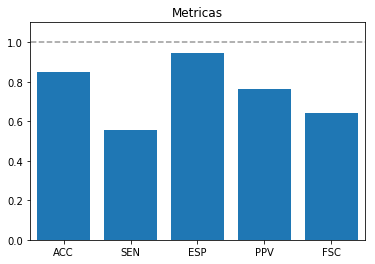

[0.8491457146825948,
 0.5546697038724373,
 0.9441484475473084,
 0.7621283255086072,
 0.6420566908371786]

In [91]:
calcula_metricas(confmat)

# Carga y transformaciones de datos

In [3]:
data = pd.read_csv('./data/census_train.csv',sep=',', decimal='.')
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,49,Private,Masters,14.0,Divorced,Sales,Unmarried,Other,Female,0.0,0.0,20.0,Peru,<=50K
1,43,Private,Assoc-acdm,12.0,Divorced,Craft-repair,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,99999.0,0.0,37.0,United-States,>50K
3,23,Private,HS-grad,9.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,3908.0,0.0,40.0,United-States,<=50K
4,32,Private,Some-college,10.0,Divorced,Handlers-cleaners,Unmarried,Black,Male,0.0,0.0,40.0,Nicaragua,<=50K


Codificamos las distintas variables para darnos opciones distintas a la hora de elegir el algoritmo del modelo

In [4]:
data.isnull().any()

age                False
workclass          False
education_level    False
education-num      False
marital-status     False
occupation         False
relationship       False
race               False
sex                False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [5]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [6]:
# codificacion de variables

wrk_LE = preprocessing.LabelEncoder() # para Workclass
edu_LE = preprocessing.LabelEncoder() # para Education Level
mar_LE = preprocessing.LabelEncoder() # Marital Status
ocu_LE = preprocessing.LabelEncoder() # Occupation
rel_LE = preprocessing.LabelEncoder() # Relationship
rac_LE = preprocessing.LabelEncoder() # Race
sex_LE = preprocessing.LabelEncoder() # Sex
nat_LE = preprocessing.LabelEncoder() # Native Country
inc_LE = preprocessing.LabelEncoder() # income

wrk_LE.fit(data['workclass'])
edu_LE.fit(data['education_level'])
mar_LE.fit(data['marital-status'])
ocu_LE.fit(data['occupation'])
rel_LE.fit(data['relationship'])
rac_LE.fit(data['race'])
sex_LE.fit(data['sex'])
nat_LE.fit(data['native-country'])
inc_LE.fit(data['income'])

data['workclass']       = wrk_LE.transform(data['workclass'])
data['education_level'] = edu_LE.transform(data['education_level'])
data['marital-status']  = mar_LE.transform(data['marital-status'])
data['occupation']      = ocu_LE.transform(data['occupation'])
data['relationship']    = rel_LE.transform(data['relationship'])
data['race']            = rac_LE.transform(data['race'])
data['sex']             = sex_LE.transform(data['sex'])
data['native-country']  = nat_LE.transform(data['native-country'])
data['income']          = inc_LE.transform(data['income'])

In [7]:

#Las variables Float las convertimos a enteros
float_col = data.select_dtypes(include = ['float64']) # Selecciona las columnas Float
for col in float_col.columns.values:
    data[col] = data[col].astype('int64')       # Transforma

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36177.0,38.598751,13.229011,17.0,28.0,37.0,47.0,90.0
workclass,36177.0,2.205877,0.963834,0.0,2.0,2.0,2.0,6.0
education_level,36177.0,10.314786,3.824565,0.0,9.0,11.0,12.0,15.0
education-num,36177.0,10.113663,2.553911,1.0,9.0,10.0,13.0,16.0
marital-status,36177.0,2.579678,1.498088,0.0,2.0,2.0,4.0,6.0
occupation,36177.0,5.964701,4.026909,0.0,2.0,6.0,9.0,13.0
relationship,36177.0,1.408519,1.596411,0.0,0.0,1.0,3.0,5.0
race,36177.0,3.681842,0.830472,0.0,4.0,4.0,4.0,4.0
sex,36177.0,0.677088,0.467596,0.0,0.0,1.0,1.0,1.0
capital-gain,36177.0,1088.861735,7506.099972,0.0,0.0,0.0,0.0,99999.0


In [9]:
data.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,49,2,12,14,0,11,4,3,0,0,0,20,28,0
1,43,2,7,12,0,2,1,4,1,0,0,40,38,0
2,53,2,10,16,2,9,5,4,0,99999,0,37,38,1
3,23,2,11,9,2,0,5,4,0,3908,0,40,38,0
4,32,2,15,10,0,5,4,2,1,0,0,40,26,0
5,29,0,15,10,3,0,3,4,0,0,0,40,38,0
6,51,2,15,10,4,0,3,4,0,0,0,40,38,0
7,33,3,11,9,2,3,0,4,1,0,0,50,38,0
8,35,1,12,14,2,9,0,4,1,0,0,40,38,0
9,39,2,15,10,2,11,0,4,1,0,0,40,38,0


Del análisis anterior, observamos que hay algunos valores de capital-gain en 99999. Tradicionalmente, este valor se da a valores desconocidos.

In [10]:
#que hago con los desconocidos
is_unknown =  data['capital-gain'] == 99999
not_unknown = data['capital-gain'] != 99999
data_99 = data[is_unknown]
print(data_99.shape)

(184, 14)


Vemos que sólo hay 184 filas con valores desconocidos, sobre las 36177 muestras del conjunto de datos. Siguiendo las indicaciones de [Analytics India Mag](https://www.analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/) tenemos las opciones de eliminar esas filas del modelo o cambiar su valor por la media/mediana/moda de la variable.
Hagamos lo que hagamos, hay que tenerlo en cuenta a la hora de realizar la prediccion con el conjunto de datos `census-test.csv`

Cómo 184 son pocas filas sobre las 361777, y valorando los pros y los contras de cada manera de gestionar los desconocidos, tomo la decisión de **ELIMINARLOS** de mi conjunto de datos de entrenamiento.

In [11]:
data = data[not_unknown]

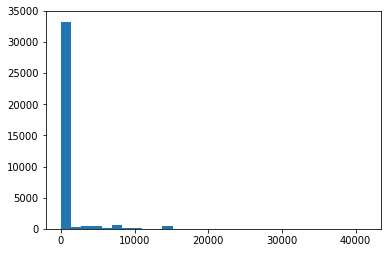

In [12]:
plt.hist(data['capital-gain'], bins=30)
plt.show()

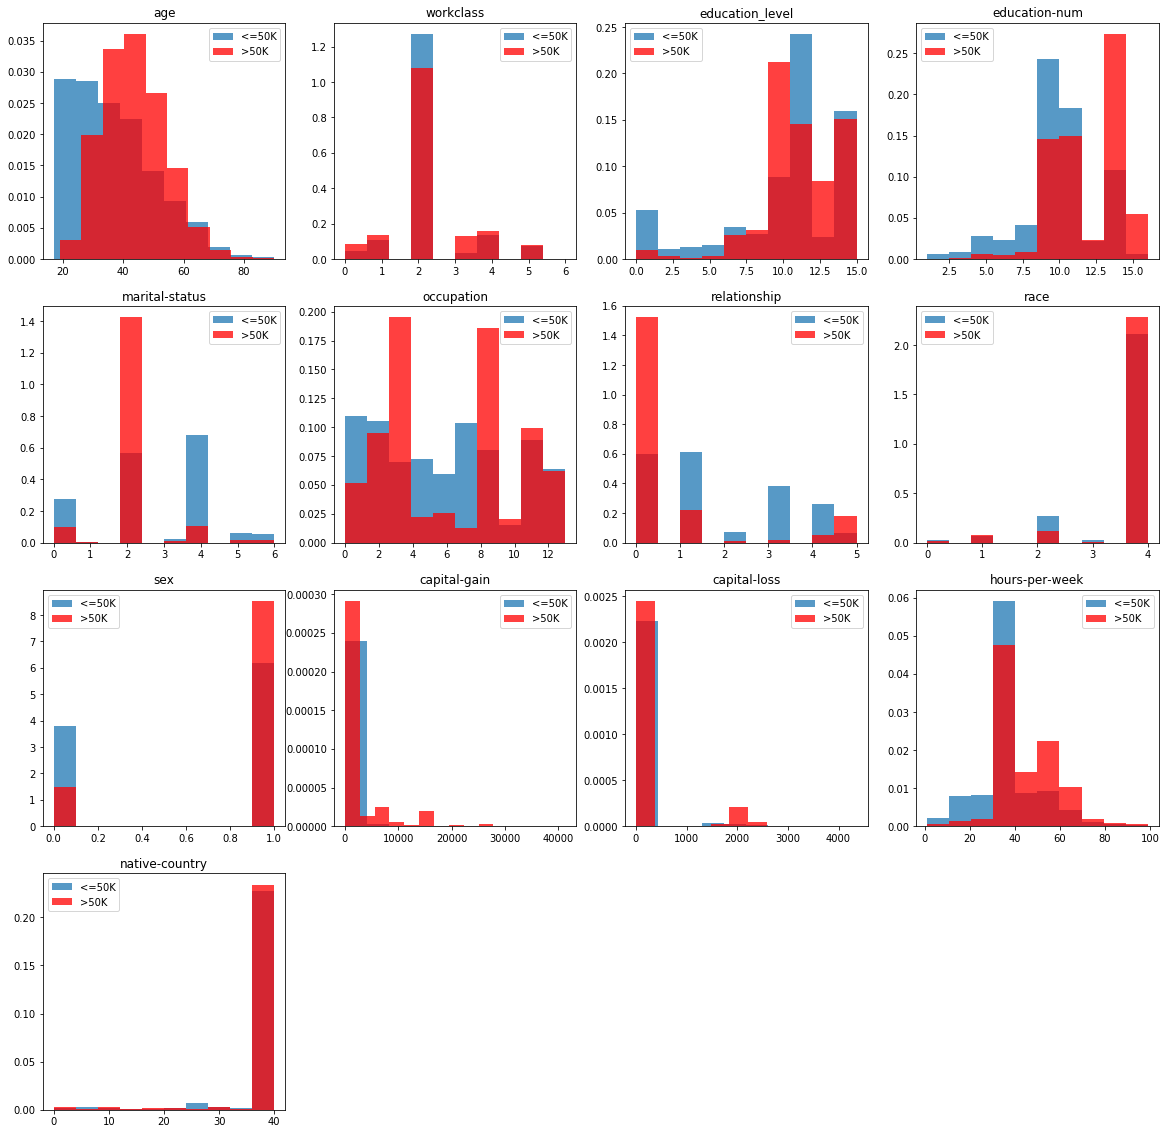

In [13]:
# Pintamos histogramas para cada clase
plt.figure(figsize=(20,20))

idx_0 =  data['income'] == 0
idx_1 =  data['income'] == 1
variables_histo = ['age', 'education-num']

for i,feature in enumerate(data.columns.drop(['income'])):
    plt.subplot(4,4,i+1)   
    plt.hist(data.ix[idx_0,feature],density=1, alpha=0.75,label='<=50K')
    plt.hist(data.ix[idx_1,feature],density=1, facecolor='red', alpha=0.75,label='>50K')
    plt.legend()
    plt.title(feature)
    
plt.show()

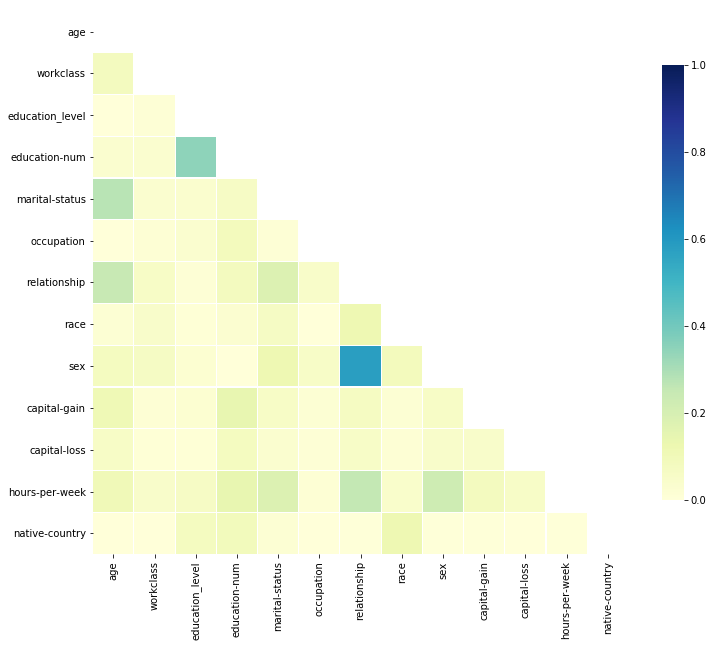

In [14]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(data.drop(['income'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Pese a que vemos una "correlación" entre `sex` y `relationship` teniendo en cuenta que son variables categoricas con pocos valores decido dejarlas. Además, como podemos ver en el siguiente gráfico, la 'correlación' no es real.

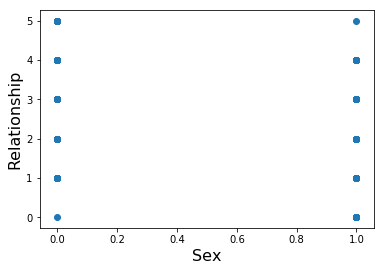

In [15]:
plt.scatter(data['sex'], data['relationship'])
plt.xlabel("Sex", fontsize=16)
plt.ylabel("Relationship", fontsize=16)
plt.show()

Para automatizar este estudio realizamos las gráficas de todas las variables contra las demás

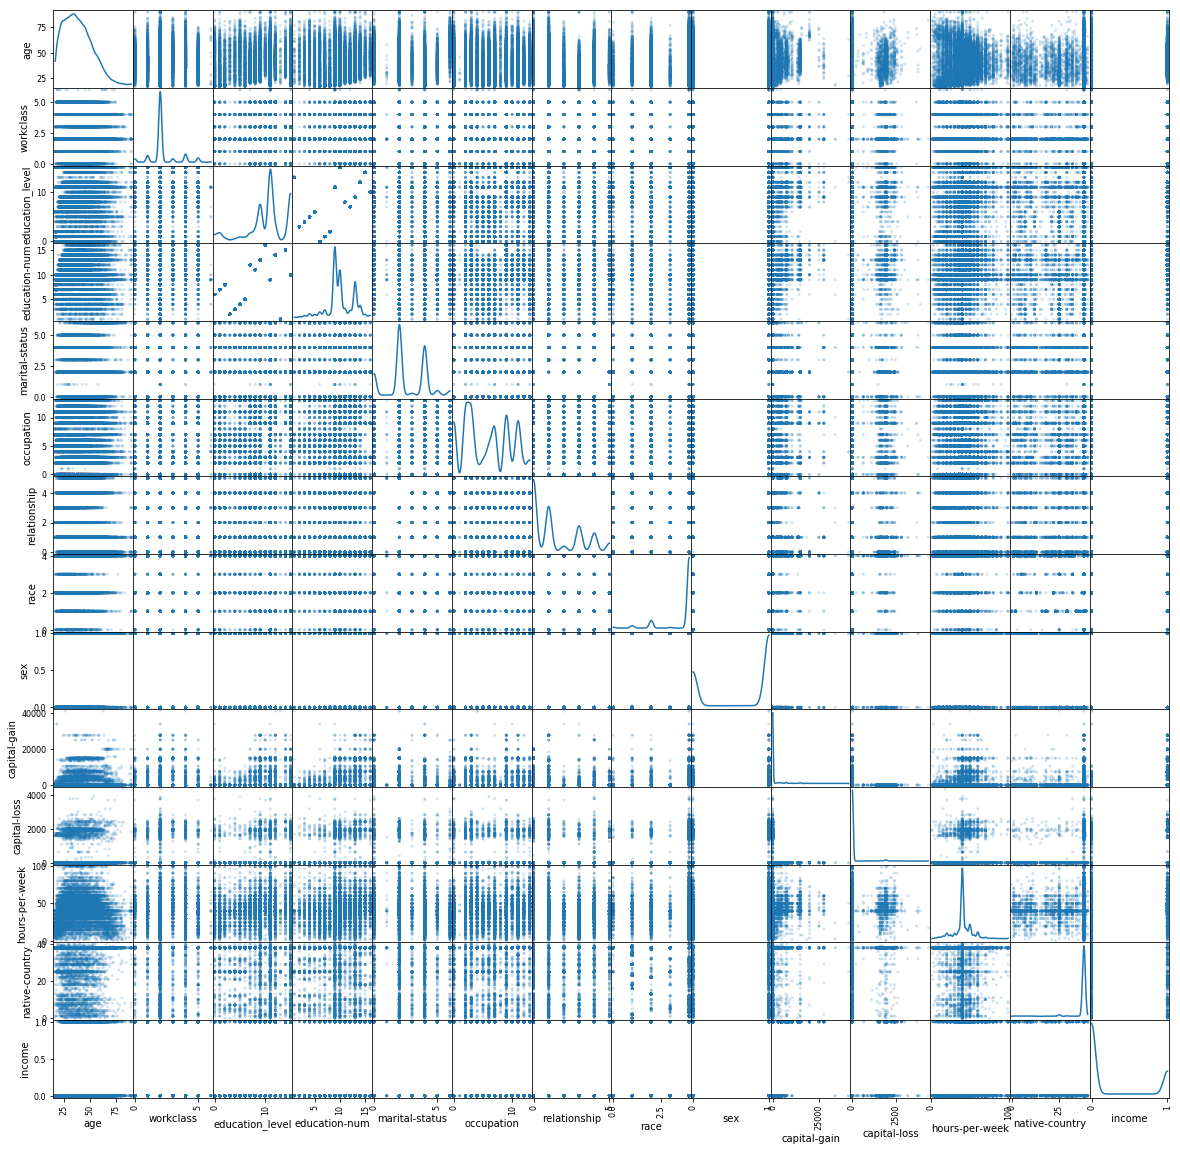

In [16]:
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

La única variable que considero que la correlación es real es entre `education_level` y `education-num`. Esto es facilmente entendible, a más años estudiados, más nivel se alcanza. 
Asi pues, eliminamos la variable `education-level`.

In [17]:
data = data.drop("education_level", axis=1)

# Creamos conjunto de test


In [227]:
from sklearn.model_selection import train_test_split

# preparamos los datos
features = data.columns.drop(['income'])
X = data[features].values
y = data['income'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state=0)

print('Datos train: ', X_train.shape)
print('Datos test:  ', X_test.shape)

Datos train:  (28794, 12)
Datos test:   (7199, 12)


# 2. Pruebas de distintos algoritmos de ML
Una vez tenemos los conjuntos de Train y Test, voy a ir probando distintos algoritmos para ver como se comportan con nuestros datos.

Para ello, el procedimiento va a ser el siguiente:
- Elegimos un modelo.
- Alimentamos un GridSearch con el modelo y los datos, asi como el parametro libre sobre el que queremos realizar la optimización.
- Representamos la evolución de ese parametro libre en el GridSearch para encontrar el que resulta más optimo. Si podemos optimizar el modelo, estos calculos se pueden realizar en la misma celda o en la siguientes, según sea necesario visualizar mejor el resultado o el tiempo de computacion.
- Los resultados del modelo, así como los parametros libres elegidos se almacenan en un dataframe `resultadosModelo` que nos permitirán realizar la eleccion del modelo al final.

A modo informativo, antes de comenzar el `GridSearch` se inicia un cronometro, con lo que podemos hacernos una idea de cuanto tiempo nos ha costado optimizar el modelo. Este valor se almacena también en el dataframe de `resultadosModelo`. También añado la matriz de conusión y las metrricas.

In [102]:
columns = ['Modelo', 'parametros-optimos', 'train', 'test', 'tiempo_optimizacion', 'confusion_matrix', 'acc_sen_esp_ppv_fsc']

resultadosModelo = pd.DataFrame(columns=columns)

def add_row(df, row):
    df.loc[-1] = row
    df.index = df.index + 1  
    return df.sort_index()

## 2.1 K-vecinos

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [104]:
# Parametro libre
nVecinos = np.arange(1, 16, 1)

In [105]:
hora_inicio = datetime.now()
param_grid = {'n_neighbors':  nVecinos}

grid = GridSearchCV(KNeighborsClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5).fit(X_train, y_train)
hora_fin = datetime.now()
tiempo_train = hora_fin - hora_inicio
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.841
best parameters: {'n_neighbors': 8}


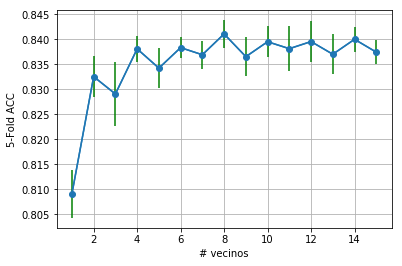

In [106]:
scores = np.array(grid.cv_results_['mean_test_score'])
stdvalues = np.array(grid.cv_results_['std_test_score'])
plt.plot(nVecinos,scores,'-o')
plt.errorbar(nVecinos, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()

ACC:  0.8470620919572163
SEN:  0.570615034168565
ESP:  0.9362483924306448
PPV:  0.742772424017791
FSC:  0.6454106280193236


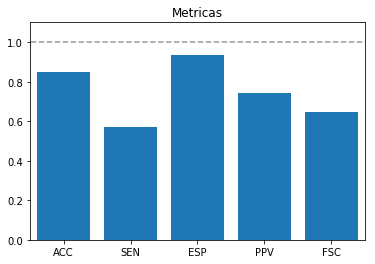

K-Vecinos
Train:  0.8720219490171564
Test:  0.8470620919572163


In [107]:
vecinosOptimos = grid.best_params_['n_neighbors']
vecinosModel = KNeighborsClassifier(n_neighbors=vecinosOptimos).fit(X_train,y_train)

resTrain = vecinosModel.score(X_train,y_train)
resTest  = vecinosModel.score(X_test,y_test)

y_pred  = vecinosModel.predict(X_test)
confmat = confusion_matrix(y_test,y_pred)

metricas = calcula_metricas(confmat)

resultado = ['K-Vecinos', grid.best_params_, resTrain, resTest , tiempo_train, confmat, metricas]

add_row(resultadosModelo, resultado)

print("K-Vecinos")
print("Train: ", resTrain)
print("Test: ", resTest)

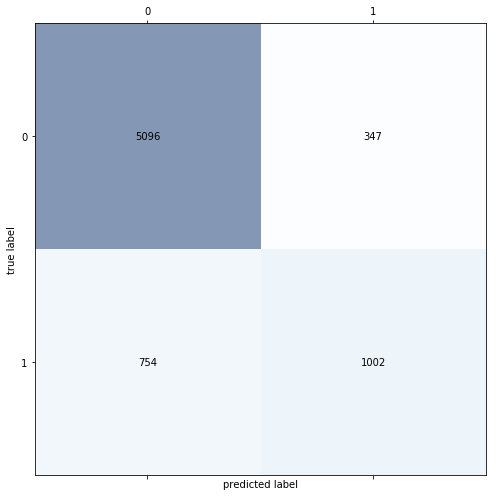

In [108]:
plot_confusion_matrix(confmat)

## 2.2 Regresión Lógistica

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
# Parametro libre
vectorC = np.logspace(-10, 20, 200)

In [111]:
param_grid = {'C': vectorC}

hora_inicio = datetime.now()

grid = GridSearchCV(LogisticRegression(fit_intercept=False), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)

hora_fin = datetime.now()
tiempo_train = hora_fin - hora_inicio

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(X_test, y_test)))


best mean cross-validation score: 0.801
best parameters: {'C': 1.7027691722258838e+16}
test-set score: 0.81


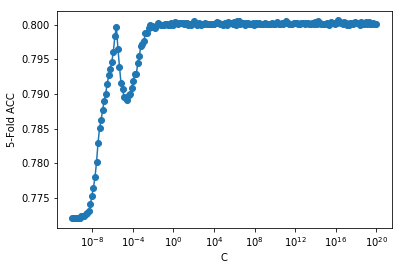

In [112]:
scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(vectorC,scores,'-o')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.show()

Aunque el algoritmo nos da un valor muy alto de C, podemos ver como a partir de 1e-2 se estabiliza. Volvemos a realizar el GridSearch en esos valores, para no elegir un valor de C que nos haga incurrir en overfitting.

En los comentarios estan las iteraciones que hemos realizado hasta encontrar un valor correcto.


best mean cross-validation score: 0.801
best parameters: {'C': 1048.1131341546852}
test-set score: 0.81


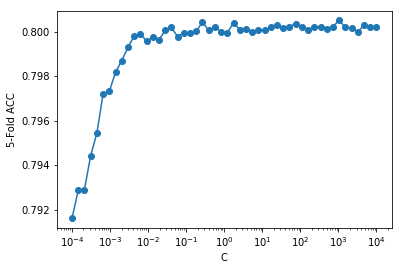

In [113]:
# Iteración  (haciendo zoom entre 1e-4 y 1e4)
# Iteración entre 1e-2 y 1e0

vectorC = np.logspace(-4, 4, 50)
param_grid = {'C': vectorC}

# hora_inicio = datetime.now()

grid = GridSearchCV(LogisticRegression(fit_intercept=False), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)

hora_fin = datetime.now()
tiempo_train = hora_fin - hora_inicio

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(X_test, y_test)))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(vectorC,scores,'-o')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.show()


Pese a que el GridSearch nos da un valor concreto, En la zona entre 1e-2 y 1e-0 cualquier valor tiene un valor optimo pues vemos que a partir de este momento las variaciones en la `accuracy` son más ruido que otra cosa.
Para evitar overfitting elegimos un valor bajo de C


ACC:  0.8199749965272954
SEN:  0.4413439635535307
ESP:  0.9421275032151387
PPV:  0.7110091743119266
FSC:  0.544624033731553


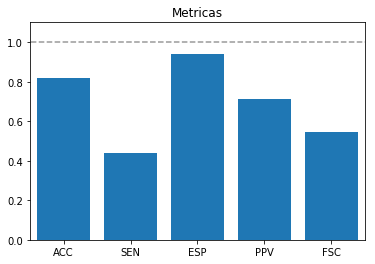

Logistic
Train:  0.818330207682156
Test:  0.8199749965272954


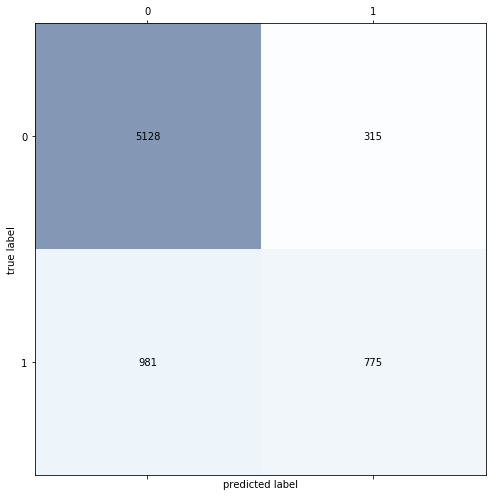

In [114]:
C = 0.1

logisticModel = LogisticRegression(C=C).fit(X_train,y_train)

resTrain = logisticModel.score(X_train,y_train)
resTest  = logisticModel.score(X_test,y_test)

y_pred  = logisticModel.predict(X_test)
confmat = confusion_matrix(y_test,y_pred)

metricas = calcula_metricas(confmat)

resultado = ['Logistic', {'C':C}, resTrain, resTest , tiempo_train, confmat, metricas]

add_row(resultadosModelo, resultado)

print("Logistic")
print("Train: ", resTrain)
print("Test: ", resTest)
plot_confusion_matrix(confmat)

## 2.3 Arboles de Decisión

best mean cross-validation score: 0.850
best parameters: {'max_depth': 8}


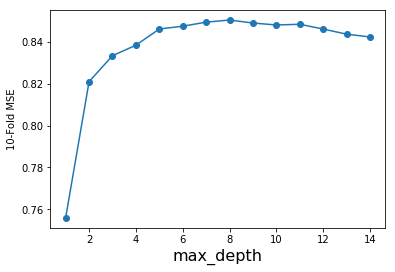

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }

hora_inicio = datetime.now()

grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)

hora_fin = datetime.now()
tiempo_train = hora_fin - hora_inicio

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

ACC:  0.8491457146825948
SEN:  0.5546697038724373
ESP:  0.9441484475473084
PPV:  0.7621283255086072
FSC:  0.6420566908371786


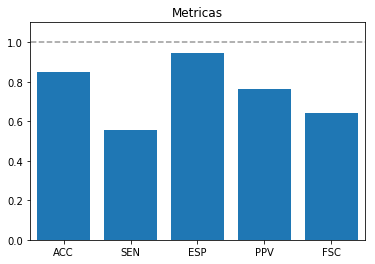

Arbol normal
Train:  0.8499687434882267
Test:  0.8491457146825948


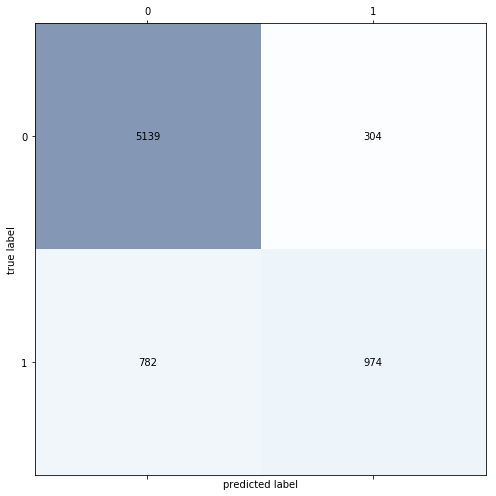

In [117]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo-2).fit(X_train,y_train)

resTrain = treeModel.score(X_train,y_train)
resTest  = treeModel.score(X_test,y_test)

y_pred  = treeModel.predict(X_test)
confmat = confusion_matrix(y_test,y_pred)

metricas = calcula_metricas(confmat)

resultado = ['Tree Model', grid.best_params_, resTrain, resTest , tiempo_train, confmat, metricas]

add_row(resultadosModelo, resultado)

print("Arbol normal")
print("Train: ",resTrain)
print("Test: ",resTest)
plot_confusion_matrix(confmat)

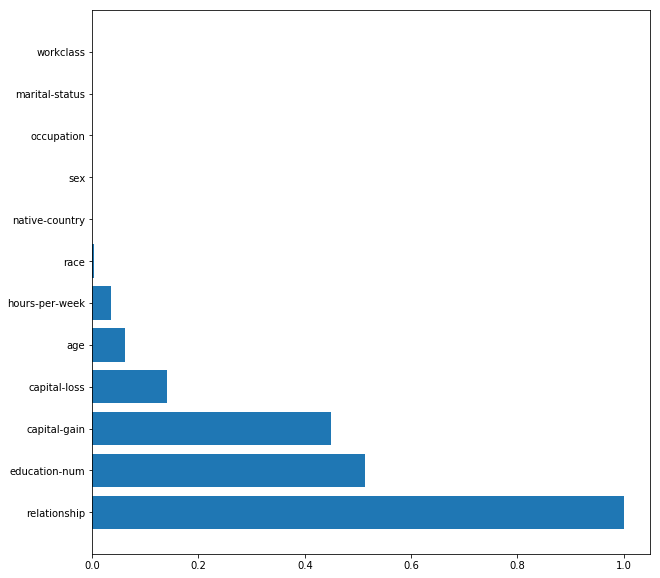

In [118]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

## 2.4 Random Forest

best mean cross-validation score: 0.860
best parameters: {'max_depth': 15}


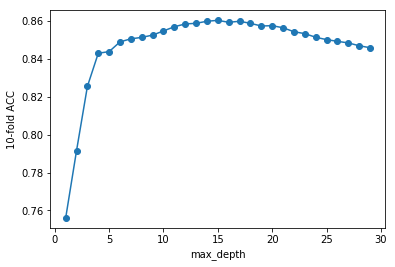

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

# grid search
maxDepth = range(1,30)
tuned_parameters = {'max_depth': maxDepth}

hora_inicio = datetime.now()

grid = GridSearchCV(RandomForestClassifier(random_state=0, 
                                           n_estimators=200, 
                                           max_features='sqrt'), 
                                           param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

hora_fin = datetime.now()
tiempo_train = hora_fin - hora_inicio

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

De nuevo vemos que las prestaciones aumentan rápidamente al principio y a partir de una profundidad de 5 lo hacen de una forma ligera. Si tomamos la profundidad optima, corremos el liesgo de overfitting. Así pues, voy a generar distintos modelos con 15, 10 y 6  de profundidad para evaluarlos. 

ACC:  0.8583136546742604
SEN:  0.5962414578587699
ESP:  0.9428623920632004
PPV:  0.7709867452135494
FSC:  0.6724470134874759


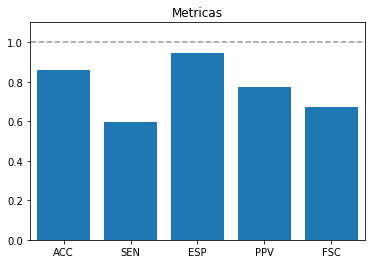

Random Forest
Train:  0.8954990623046468
Test:  0.8583136546742604


In [121]:
maxDepthOptimo = grid.best_params_['max_depth']

randomForestModel = RandomForestClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

resTrain = randomForestModel.score(X_train,y_train)
resTest  = randomForestModel.score(X_test,y_test)

y_pred  = randomForestModel.predict(X_test)
confmat = confusion_matrix(y_test,y_pred)

metricas = calcula_metricas(confmat)

resultado = ['RandomForest-15', grid.best_params_, resTrain, resTest, tiempo_train, confmat, metricas]

add_row(resultadosModelo, resultado)

print("Random Forest")
print("Train: ",resTrain)
print("Test: ",resTest)

ACC:  0.8542853174051952
SEN:  0.556378132118451
ESP:  0.9503950027558332
PPV:  0.7834803528468324
FSC:  0.6506826506826506


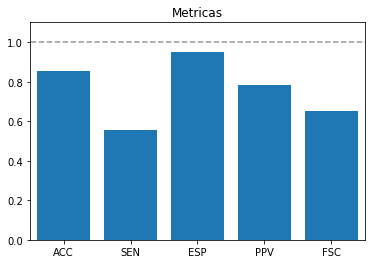

Random Forest_10
Train:  0.864971869139404
Test:  0.8542853174051952


In [148]:
maxDepthOptimo = 10

randomForestModel_10 = RandomForestClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

resTrain = randomForestModel_10.score(X_train,y_train)
resTest  = randomForestModel_10.score(X_test,y_test)

y_pred  = randomForestModel_10.predict(X_test)
confmat = confusion_matrix(y_test,y_pred)

metricas = calcula_metricas(confmat)

resultado = ['RandomForest_10', "MaxDepth = 10", resTrain, resTest, tiempo_train, confmat, metricas]

add_row(resultadosModelo, resultado)

print("Random Forest_10")
print("Train: ",resTrain)
print("Test: ",resTest)

ACC:  0.8512293374079734
SEN:  0.5222095671981777
ESP:  0.9573764468124196
PPV:  0.7980852915578764
FSC:  0.6313253012048192


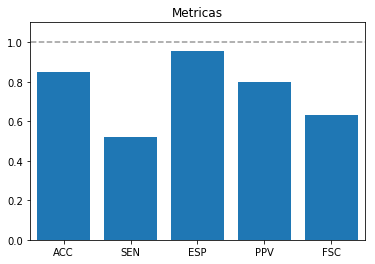

Random Forest_6
Train:  0.8506286031812184
Test:  0.8512293374079734


In [149]:
maxDepthOptimo = 6

randomForestModel_6 = RandomForestClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

resTrain = randomForestModel_6.score(X_train,y_train)
resTest  = randomForestModel_6.score(X_test,y_test)

y_pred  = randomForestModel_6.predict(X_test)
confmat = confusion_matrix(y_test,y_pred)

metricas = calcula_metricas(confmat)

resultado = ['RandomForest_6', "Max Depth = 6", resTrain, resTest, tiempo_train, confmat, metricas]

add_row(resultadosModelo, resultado)

print("Random Forest_6")
print("Train: ",resTrain)
print("Test: ",resTest)

Parece mejor opción el usar una profundidad de 6 ya que las prestaciones en test y train se mantienen

### Selección de características

Por último, vamos a intentar optimizar el algoritmo haciendo selección de caracteristicas. Para ello, calculamos  la matriz de importancia para cada uno de los modelos elegidos.

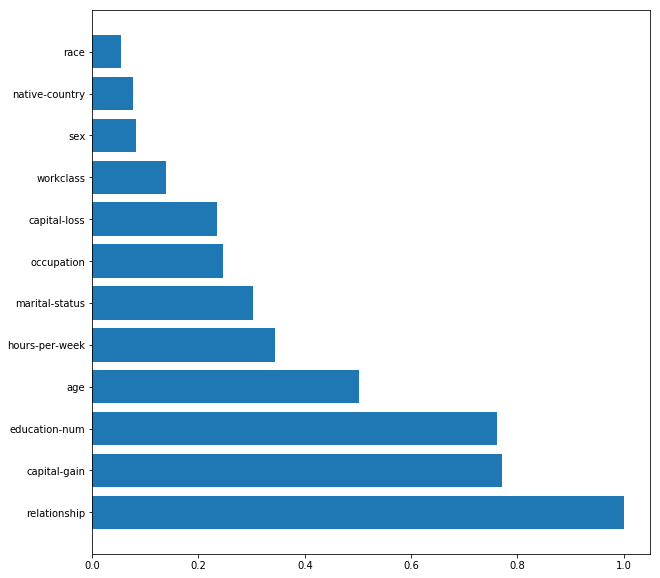

In [185]:
importances = randomForestModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

In [255]:
importances_6 = randomForestModel_6.feature_importances_
importances_6 = importances_6 / np.max(importances)

importances_10 = randomForestModel_10.feature_importances_
importances_10 = importances_10 / np.max(importances)

RF_Optimal number of features : 9
RF_6_Optimal number of features : 10
RF_10_Optimal number of features : 10


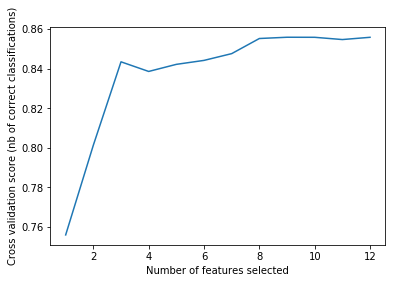

In [187]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=randomForestModel, step=1, cv=StratifiedKFold(3),
              scoring='accuracy')
rfecv.fit(X, y)

print("RF_Optimal number of features : %d" % rfecv.n_features_)

rfecv_6 = RFECV(estimator=randomForestModel_6, step=1, cv=StratifiedKFold(3),
              scoring='accuracy')
rfecv_6.fit(X, y)

rfecv_10 = RFECV(estimator=randomForestModel_10, step=1, cv=StratifiedKFold(3),
              scoring='accuracy')
rfecv_10.fit(X, y)

print("RF_6_Optimal number of features : %d" % rfecv_6.n_features_)
print("RF_10_Optimal number of features : %d" % rfecv_10.n_features_)



# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Hacemos una funcion para obtener una lista con las N caracteristicas con más peso segun la matriz de importancia.

In [215]:
def seleccion_caracteristicas(features, number, importances):
    '''Entra una lista de features, una matriz de importancia y un numero (n), y devuelve una lista
    de las n features seleccionadas '''
    imp_ordenada = np.sort(importances) #sort
    imp_ordenada = imp_ordenada[::-1] # Reverse

    valor_corte=imp_ordenada[number-1] #sacamos cual es el valor que nos vamos a quedar
    
    i=0
    selected_features = []
    while i<len(features):
        if importances[i]>=valor_corte:
            selected_features.append(features[i])
        i+=1
    return(selected_features)        
    

In [246]:
def indice_caracteristica(features, selected):
    '''
    Recibe una lista de features y de seleccionadas y devuelve una lista con los indices de las seleccionadas
    '''
    l = []
    i = 0
    while i < len(features):
        if features[i] in selected:
            l.append(i)
        i += 1
    return l

Entrenamos los modelos sólo con las caracteristicas optimas.

In [253]:
s_normal = seleccion_caracteristicas(features, rfecv.n_features_, importances)
s_6 = seleccion_caracteristicas(features, rfecv_6.n_features_, importances_6)
s_10 = seleccion_caracteristicas(features, rfecv_10.n_features_, importances_10)

In [254]:
indices = indice_caracteristica(features, s)
indices_6 = indice_caracteristica(features, s_6)
indices_10 = indice_caracteristica(features, s_10)

In [252]:
X_train[:, indices]

array([[ 6,  0,  0],
       [ 9,  4,  0],
       [ 4,  0,  0],
       ...,
       [10,  1,  0],
       [ 9,  1,  0],
       [13,  1,  0]])

In [258]:
randomForestModel_sel = RandomForestClassifier(max_depth=15).fit(X_train[:, indices],y_train)
randomForestModel_6_sel = RandomForestClassifier(max_depth=6).fit(X_train[:, indices_6],y_train)
randomForestModel_10_sel = RandomForestClassifier(max_depth=10).fit(X_train[:, indices_10],y_train)

ACC:  0.8427559383247674
SEN:  0.5085421412300684
ESP:  0.9505787249678486
PPV:  0.7685025817555938
FSC:  0.6120630568882797


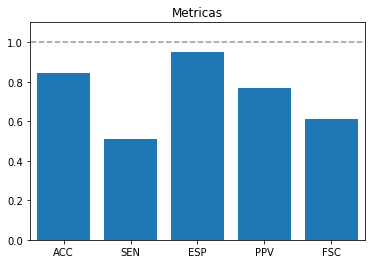

Random Forest_15_SC
Train:  0.8461832326179065
Test:  0.8427559383247674


In [268]:
resTrain_sel = randomForestModel_sel.score(X_train[:, indices],y_train)
resTest_sel  = randomForestModel_sel.score(X_test[:, indices],y_test)
y_pred_sel  = randomForestModel_sel.predict(X_test[:, indices])
confmat = confusion_matrix(y_test,y_pred_sel)
metricas = calcula_metricas(confmat)

resultado = ['RandomForest_15_SC', "MaxDepth = 15"+" caracteristicas: " + str(s_normal), 
             resTrain_sel, resTest_sel, 0, confmat, metricas]

add_row(resultadosModelo, resultado)

print("Random Forest_15_SC")
print("Train: ",resTrain_sel)
print("Test: ",resTest_sel)

ACC:  0.8501180719544381
SEN:  0.5370159453302962
ESP:  0.9511298916038949
PPV:  0.7799834574028123
FSC:  0.6360876897133221


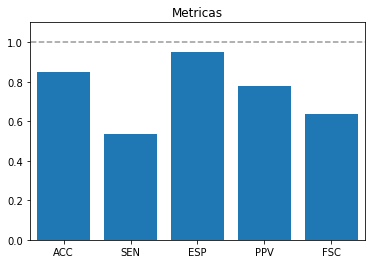

Random Forest_6_SC
Train:  0.8499340140307008
Test:  0.8501180719544381


In [269]:
resTrain_sel = randomForestModel_6_sel.score(X_train[:, indices_6],y_train)
resTest_sel  = randomForestModel_6_sel.score(X_test[:, indices_6],y_test)
y_pred_sel  = randomForestModel_6_sel.predict(X_test[:, indices_6])
confmat = confusion_matrix(y_test,y_pred_sel)
metricas = calcula_metricas(confmat)

resultado = ['RandomForest_6_SC', "MaxDepth = 6"+" caracteristicas: " + str(s_normal), 
             resTrain_sel, resTest_sel, 0, confmat, metricas]

add_row(resultadosModelo, resultado)

print("Random Forest_6_SC")
print("Train: ",resTrain_sel)
print("Test: ",resTest_sel)

ACC:  0.8583136546742604
SEN:  0.5677676537585421
ESP:  0.9520485026639721
PPV:  0.7925278219395866
FSC:  0.6615792966157928


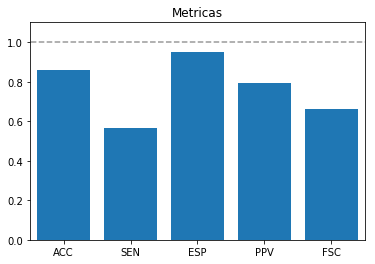

Random Forest_10_SC
Train:  0.865249704799611
Test:  0.8583136546742604


In [270]:
resTrain_sel = randomForestModel_10_sel.score(X_train[:, indices_10],y_train)
resTest_sel  = randomForestModel_10_sel.score(X_test[:, indices_10],y_test)
y_pred_sel  = randomForestModel_10_sel.predict(X_test[:, indices_10])
confmat = confusion_matrix(y_test,y_pred_sel)
metricas = calcula_metricas(confmat)

resultado = ['RandomForest_10_SC', "MaxDepth = 10"+" caracteristicas: " + str(s_normal), 
             resTrain_sel, resTest_sel, 0, confmat, metricas]

add_row(resultadosModelo, resultado)

print("Random Forest_10_SC")
print("Train: ",resTrain_sel)
print("Test: ",resTest_sel)

## 2.5 Boosted Tree

Con esta profundidad entrenamos el modelo para distintas iteraciones y tasas de aprendizaje.

(Este proceso es lento de optimizar, tenerlo en cuenta a la hora de ejecutar estas celdas)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [25,50,75,100,125,150,175,200,300]
learningRate = [0.5,0.1,0.05,0.01]
#max_depth_tried = [5,6,7,8,9]
max_depth_tried = [7]

hora_inicio = datetime.now()

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate, 'max_depth': max_depth_tried}
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=2), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

In [ ]:
# calculamos métricas globales

max_depth = grid.best_params_['max_depth']
learning_rate = grid.best_params_['learning_rate']
n_estimators = grid.best_params_['n_estimators']

bt = GradientBoostingClassifier(random_state=0, max_depth=max_depth,learning_rate = learning_rate, 
                                n_estimators= n_estimators)
bt.fit(X_train,y_train)

hora_fin = datetime.now()
tiempo_train = hora_fin - hora_inicio

In [ ]:
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations),len(max_depth_tried))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

Probamos con distintas profundidades. (Lo podriamos haber hecho con el mismo gridSearch, pero para verlo mejor en las graficas, lo hacemos de forma iterativa)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [25,50,75,100,125,150,175,200,300]
learningRate = [0.5,0.1,0.05,0.01]
#max_depth_tried = [5,6,7,8,9]
max_depth_tried = [9]

# hora_inicio = datetime.now()

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate, 'max_depth': max_depth_tried}
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=2), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

In [ ]:
# calculamos métricas globales

max_depth = grid.best_params_['max_depth']
learning_rate = grid.best_params_['learning_rate']
n_estimators = grid.best_params_['n_estimators']

bt = GradientBoostingClassifier(random_state=0, max_depth=max_depth,learning_rate = learning_rate, 
                                n_estimators= n_estimators)
bt.fit(X_train,y_train)


In [ ]:
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations),len(max_depth_tried))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [25,50,75,100,125,150,175,200,300]
learningRate = [0.5,0.1,0.05,0.01]
#max_depth_tried = [5,6,7,8,9]
max_depth_tried = [5]

# hora_inicio = datetime.now()

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate, 'max_depth': max_depth_tried}
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=2), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

In [ ]:
# calculamos métricas globales

max_depth = grid.best_params_['max_depth']
learning_rate = grid.best_params_['learning_rate']
n_estimators = grid.best_params_['n_estimators']

bt = GradientBoostingClassifier(random_state=0, max_depth=max_depth,learning_rate = learning_rate, 
                                n_estimators= n_estimators)
bt.fit(X_train,y_train)


In [ ]:
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations),len(max_depth_tried))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [ ]:
hora_fin = datetime.now()
tiempo_train = hora_fin - hora_inicio

In [ ]:
tiempo_train

Viendo estos resultados, vemos que el resultado más optimo es con `max_depth=7`. Volvemos a entrenar el modelo con estos parametros y obtenemos los resultados de Train y Test.

ACC:  0.8676205028476177
SEN:  0.6417995444191344
ESP:  0.9404740033069998
PPV:  0.7767057201929704
FSC:  0.702837542874961


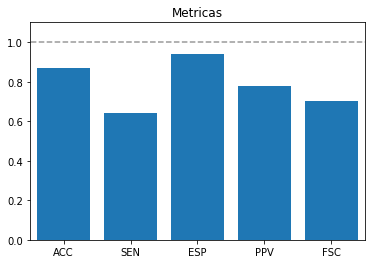

Boosted Tree
Train:  0.8875112870736959
Test:  0.8676205028476177


In [132]:
resTrain = bt.score(X_train,y_train)
resTest  = bt.score(X_test,y_test)

y_pred  = bt.predict(X_test)
confmat = confusion_matrix(y_test,y_pred)

metricas = calcula_metricas(confmat)

resultado = ['Boosted Tree', grid.best_params_, resTrain, resTest, tiempo_train, confmat, metricas ]

add_row(resultadosModelo, resultado)

print("Boosted Tree")
print("Train: ",resTrain)
print("Test: ",resTest)

## 2.6 SVM


(El algoritmo de SVM es lento de entrenar. Tenlo en cuenta si le das a ejecutar a estas celdas de este workbook.)

In [52]:
from sklearn.svm import SVC

hora_inicio = datetime.now()
print("He empezado a las ",hora_inicio)

# Paso 2: Búsqueda de parámtros libres
vectorC = np.logspace(-12, 0, 30)
vectorG = np.logspace(-3, 3, 30)

#vectorG = [0.00206913808111479]

param_grid = {'C': vectorC, 'gamma':vectorG}

grid = GridSearchCV(SVC(kernel='rbf'), scoring = 'accuracy', param_grid = param_grid, cv = 3)
grid.fit(X_train, y_train)

hora_fin = datetime.now()

tiempo_train = hora_fin - hora_inicio

print("he terminado a las ",hora_fin)
print("Me ha costado ", tiempo_train)


He empezado a las  2019-06-03 07:30:45.016285
he terminado a las  2019-06-03 14:47:42.756878
Me ha costado  7:16:57.740593


Hacemos una primera aproximacion para ver como se comporta el 

best mean cross-validation score: 0.844
best parameters: {'C': 1.0, 'gamma': 0.0041753189365604}


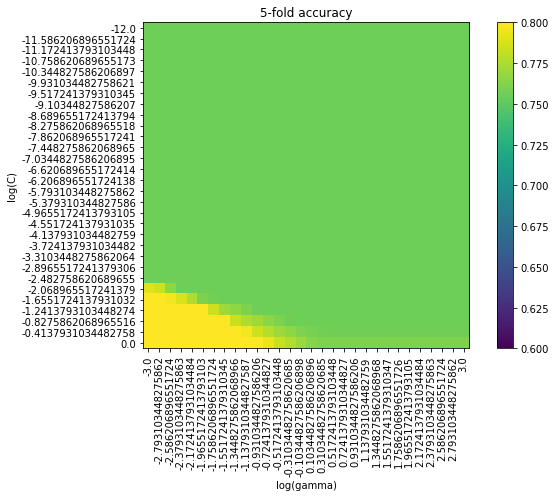

In [53]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.8)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [56]:
from sklearn.svm import SVC

hora_inicio = datetime.now()
print("He empezado a las ",hora_inicio)

# Paso 2: Búsqueda de parámtros libres
vectorC = np.logspace(-3.72, 4, 30)
vectorG = np.logspace(-9, 1, 30)

#vectorG = [0.00206913808111479]

param_grid = {'C': vectorC, 'gamma':vectorG}

grid2 = GridSearchCV(SVC(kernel='rbf'), scoring = 'accuracy', param_grid = param_grid, cv = 3)
grid2.fit(X_train, y_train)

hora_fin = datetime.now()

tiempo_train = hora_fin - hora_inicio

print("he terminado a las ",hora_fin)
print("Me ha costado ", tiempo_train)


He empezado a las  2019-06-03 17:31:37.499011
he terminado a las  2019-06-04 13:23:51.019081
Me ha costado  19:52:13.520070


best mean cross-validation score: 0.855
best parameters: {'C': 861.335632349597, 'gamma': 0.0007278953843983161}


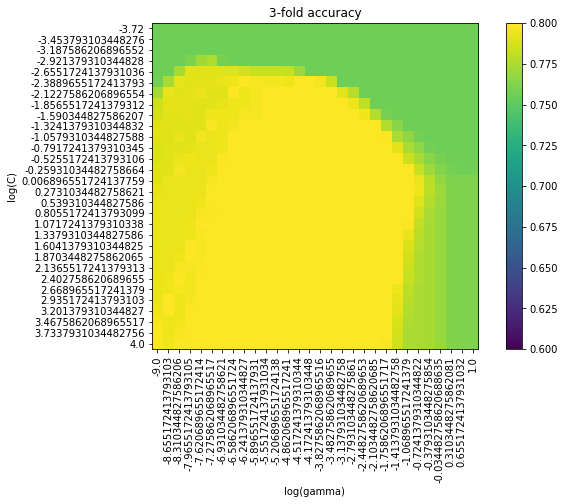

In [61]:
print("best mean cross-validation score: {:.3f}".format(grid2.best_score_))
print("best parameters: {}".format(grid2.best_params_))

# Mostramos prestaciones en CV
scores = grid2.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.8)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('3-fold accuracy')
plt.show()

**TODO** Falta sacar resultados optimizados de SVM

# 3. Elección de Modelo

El viaje ha sido largo. Hemos desarrollado y entrenado muchos modelos. Algunos de ellos han sido muy lentos de entrenar y ahora llega el momento de elegir el que mejor se comporta. Para ello lo que nos interesa es que el valor de `train` sea alto, y que no exista mucha diferencia entre `train` y `test`.

In [51]:
resultadosModelo

,Modelo,parametros-optimos,train,test,tiempo_train
4,K-Vecinos,{'n_neighbors': 8},0.872022,0.847062,00:03:02.465050
3,Logistic,{'C': 0.1},0.818330,0.819975,00:00:21.087958
2,Tree Model,{'max_depth': 8},0.849969,0.849146,00:00:03.583451
1,RandomForest,{'max_depth': 15},0.896402,0.861925,00:10:41.482673
0,Boosted Tree,"{'learning_rate': 0.05, 'max_depth': 6, 'n_est...",0.882892,0.866926,00:35:21.364565


Podriamos elegir #### pero ####

Viendo los resultados obtenidos con los distintos modelos, observamos que el que nos da mejores resultados el `Random Forest` con una `max_depth`de 17.

Una vez elegido el modelo, lo entrenamos de nuevo con todo el conjunto de datos.

In [ ]:
# preparamos los datos
features = data.columns.drop(['income'])
X = data[features].values
y = data['income'].values

# Entrenamos el modelo elegido con todos los datos
maxDepthOptimo = 17

modeloElegido = KNeighborsClassifier(n_neighbors=vecinosOptimos).fit(X,y)

In [ ]:
X.shape

In [ ]:
data[features].head()

Tomamos el conjunto de datos de Test

In [ ]:
test_data = pd.read_csv('./data/census_test.csv',sep=',', decimal='.')
test_data.head()

Le aplicamos todas las transformaciones que hemos hecho previamente al entrenamiento del modelo

In [ ]:
# Codificacion de variables

test_data['workclass']       = wrk_LE.transform(test_data['workclass'])
test_data['education_level'] = edu_LE.transform(test_data['education_level'])
test_data['marital-status']  = mar_LE.transform(test_data['marital-status'])
test_data['occupation']      = ocu_LE.transform(test_data['occupation'])
test_data['relationship']    = rel_LE.transform(test_data['relationship'])
test_data['race']            = rac_LE.transform(test_data['race'])
test_data['sex']             = sex_LE.transform(test_data['sex'])
test_data['native-country']  = nat_LE.transform(test_data['native-country'])

# Eliminación de columnas (Education Level)
test_data = test_data.drop("education_level", axis=1)

In [ ]:
test_data.head(2)

In [ ]:
features = test_data.columns.drop(['id'])
X = test_data[features].values


In [ ]:
data.head(2)


In [ ]:
features = test_data.columns.drop(['id'])
X = test_data[features].values

In [ ]:
y_pred = modeloElegido.predict(X)

In [ ]:
test_data['target'] = y_pred

In [ ]:
test_data.head()

In [ ]:
test_data = test_data.drop(["education-num",
                            "age",
                            "workclass",
                            "occupation",
                            "marital-status",
                            "relationship",
                            "race",
                            "sex",
                            "capital-gain",
                            "capital-loss",
                            "hours-per-week",
                            "native-country"], axis=1)

In [ ]:
test_data.to_csv('./data/census_pred.csv',sep=',', decimal='.')

In [ ]:
from sklearn.svm import SVC
hora_inicio = datetime.now()

# Paso 2: Búsqueda de parámtros libres
vectorC = np.logspace(-1, 3, 20)
vectorG = np.logspace(-9, -1, 20)

param_grid = {'C': vectorC, 'gamma':vectorG}

grid = GridSearchCV(SVC(kernel='rbf'), scoring = 'accuracy', param_grid = param_grid, cv = 5)
grid.fit(X_train, y_train)
######

hora_fin = datetime.now()

tiempo_train = hora_fin - hora_inicio


In [ ]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.8)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()